In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [4]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])


In [6]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8688 - loss: 0.4507 - val_accuracy: 0.9630 - val_loss: 0.1223
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9637 - loss: 0.1187 - val_accuracy: 0.9728 - val_loss: 0.0944
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9715 - val_loss: 0.0946
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9843 - loss: 0.0523 - val_accuracy: 0.9792 - val_loss: 0.0799
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9773 - val_loss: 0.0811
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0950

Test Accuracy: 0.9743


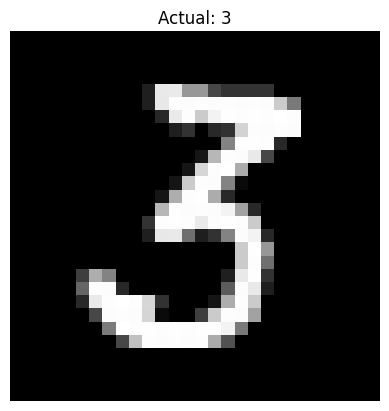

In [7]:
# Predict and show a sample
import numpy as np

sample_index = np.random.randint(len(x_test))
sample_image = x_test[sample_index]
plt.imshow(sample_image, cmap='gray')
plt.title("Actual: {}".format(y_test[sample_index]))
plt.axis('off')
plt.show()

In [8]:
prediction = model.predict(sample_image.reshape(1, 28, 28))
print("Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted digit: 3
